In [41]:
import numpy as np
import pandas as pd
import plotnine as pn 
from sklearn.linear_model import LinearRegression

In [42]:
df = pd.read_csv('data/auto_mpg.csv')   #read data
df['hp_sq'] = df.hp**2  #create columns for squared variable
df['disp_sq'] = df.disp**2
df['weight_sq'] = df.weight**2
df['accel_sq'] = df.accel**2
xhp = df[['hp', 'hp_sq']]  #set variables to compare as predictors
xdisp = df[['disp', 'disp_sq']]
xweight = df[['weight', 'weight_sq']]
xaccel = df[['accel', 'accel_sq']]
y = df.mpg

Best model: weight
R^2 value:  0.7151475557845139


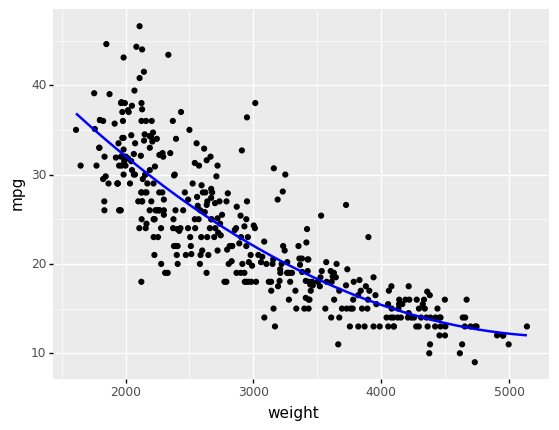

<ggplot: (137280702702)>

In [45]:
modelhp = LinearRegression().fit(xhp, y)   #set linear models
modeldisp = LinearRegression().fit(xdisp, y)
modelweight = LinearRegression().fit(xweight, y)
modelaccel = LinearRegression().fit(xaccel, y)
model = modelhp
x = xhp
df_var = [modelhp.score(xhp, y), modeldisp.score(xdisp, y), modelweight.score(xweight, y), modelaccel.score(xaccel, y)] #initialize and fill comparison array
max_score = df_var[0]

xvals = np.linspace(x.hp.min(), x.hp.max(), len(df))  #initialize xvals
xy_predict = pd.DataFrame({ #initialize prediction dataframe
    'hp': xvals,
    'hp_sq': xvals**2
})

for i in df_var:    #selection by model score
    max_score = max(i, max_score)

if max_score == df_var[1]:  #set variables and model based on best score
    model = modeldisp
    x = xdisp
    xvals = np.linspace(x.disp.min(), x.disp.max(), len(df))    #set xvals
    xy_predict = pd.DataFrame({ #set xy prediction dataframe
        'disp': xvals,
        'disp_sq': xvals**2
    })
    y_predict = model.predict(xy_predict)   #y prediction
    pn.ggplot(df, pn.aes(x='disp', y='mpg',)) + pn.geom_point() + pn.geom_line(data = xy_predict, mapping=pn.aes(x=xvals, y=y_predict), color = 'blue', size = 1.0) #plot
    print('Best model: displacement')
elif max_score == df_var[2]:
    model = modelweight
    x = xweight
    xvals = np.linspace(x.weight.min(), x.weight.max(), len(df))
    xy_predict = pd.DataFrame({
        'weight': xvals,
        'weight_sq': xvals**2
    })
    y_predict = model.predict(xy_predict)
    pn.ggplot(df, pn.aes(x='weight', y='mpg',)) + pn.geom_point() + pn.geom_line(data = xy_predict, mapping=pn.aes(x=xvals, y=y_predict), color = 'blue', size = 1.0)
    print('Best model: weight')
elif max_score == df_var[3]:
    model = modelaccel
    x = xaccel
    xvals = np.linspace(x.disp.min(), x.disp.max(), len(df))
    xy_predict = pd.DataFrame({
        'accel': xvals,
        'accel_sq': xvals**2
    })
    y_predict = model.predict(xy_predict)
    pn.ggplot(df, pn.aes(x='accel', y='mpg',)) + pn.geom_point() + pn.geom_line(data = xy_predict, mapping=pn.aes(x=xvals, y=y_predict), color = 'blue', size = 1.0)
    print('Best model: acceleration')
else:
    y_predict = model.predict(xy_predict)
    pn.ggplot(df, pn.aes(x='hp', y='mpg',)) + pn.geom_point() + pn.geom_line(data = xy_predict, mapping=pn.aes(x=xvals, y=y_predict), color = 'blue', size = 1.0)
    print('Best model: horsepower')

print('R^2 value: ', model.score(x, y))

y_predict = model.predict(xy_predict)   #y prediction
pn.ggplot(df, pn.aes(x='weight', y='mpg',)) + pn.geom_point() + pn.geom_line(data = xy_predict, mapping=pn.aes(x=xvals, y=y_predict), color = 'blue', size = 1.0)